# **Imporing Dependencies**

In [60]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# **Data Collection**

In [61]:
# loading the dataset to a pandas dataframe
df = pd.read_excel('/content/Wine Quality Dataset.xlsx')

In [62]:
df.shape

(1599, 12)

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [64]:
# Checking for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,1
density,0
pH,1
sulphates,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


# **Data Analysis and Visualization**

In [66]:
# Statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


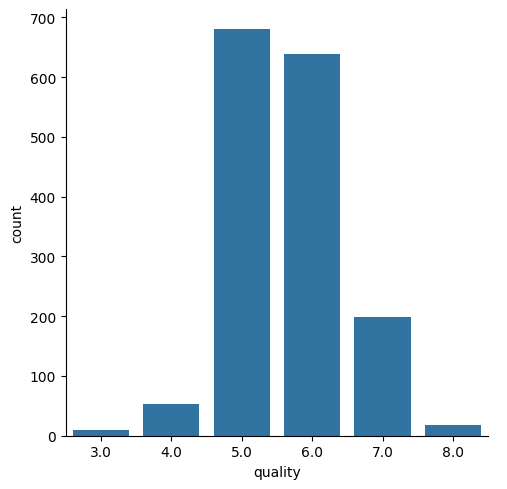

In [67]:
# number of values for each quality
sns.catplot(x='quality', data=df, kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

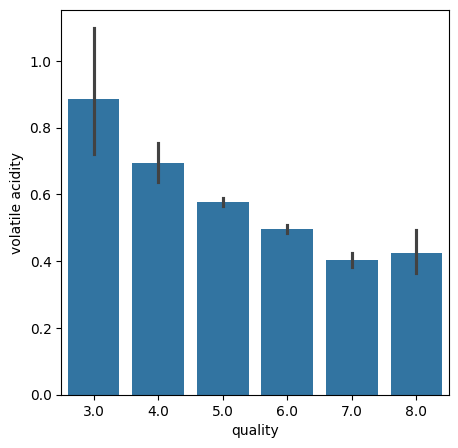

In [68]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)


<Axes: xlabel='quality', ylabel='citric acid'>

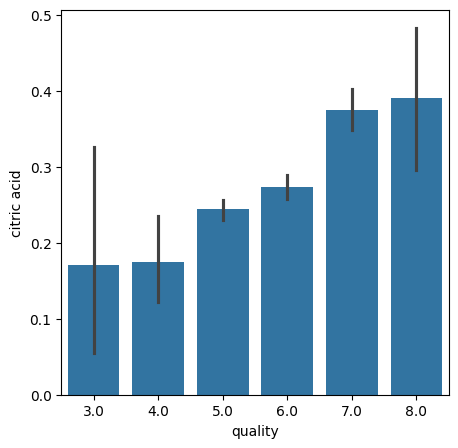

In [69]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

# **Correlation**

In [70]:
correlation = df.corr()

In [71]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112792,0.668047,0.027553,0.183006,-0.061668,0.123987
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076703,0.022026,-0.046456,-0.260987,-0.202288,-0.390258
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035084,0.364947,0.008415,0.312770,0.109903,0.225867
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200939,0.355283,0.040013,0.005527,0.042075,0.013756
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047815,0.200632,-0.258644,0.371260,-0.221141,-0.129011
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668152,-0.021946,-0.025389,0.051658,-0.069408,-0.050899
total sulfur dioxide,-0.112792,0.076703,0.035084,0.200939,0.047815,0.668152,1.000000,0.070750,-0.162776,0.042109,-0.205914,-0.184699
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070750,1.000000,-0.037946,0.148506,-0.496180,-0.174741
pH,0.027553,-0.046456,0.008415,0.040013,-0.258644,-0.025389,-0.162776,-0.037946,1.000000,-0.260525,0.233479,0.133961
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042109,0.148506,-0.260525,1.000000,0.093595,0.251118


<Axes: >

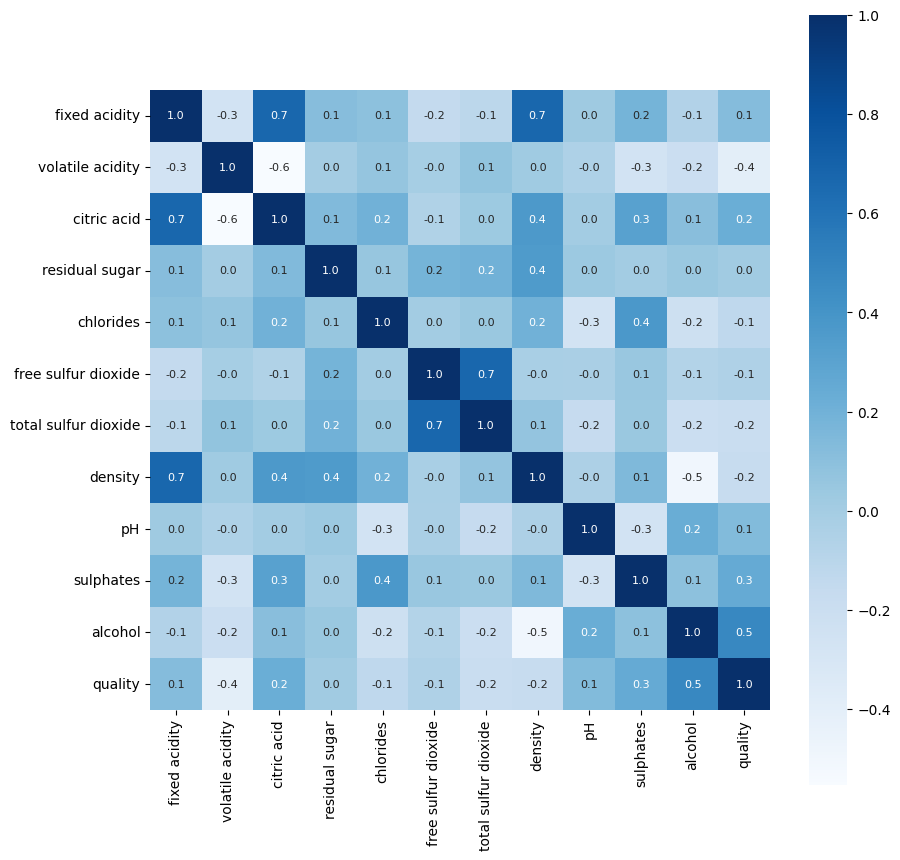

In [72]:
# constructing a heatmap to understand the correlation between the columns
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# **Data Preprocessing**

In [73]:
# seperate the data and label
x = df.drop('quality', axis=1)

In [74]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# **Label Binarization**

In [75]:
y = df['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

In [76]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# **Train and Test split**

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =3)

In [78]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [79]:
if not isinstance(x, pd.DataFrame):
  x = pd.DataFrame(x)

# Create a SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


# **Model Training**

In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)


# **Model Evaluation**

In [83]:
print('Accuracy:',test_data_accuracy)


Accuracy: 0.928125


# **Building a Predictive System**

In [84]:
input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
#changing the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
  print('Good quality Wine')
else:
  print('Bad quality Wine')


[1]
Good quality Wine
